In [1]:
import torch
import graphgallery 
import matplotlib.pyplot as plt


# Set if memory growth should be enabled for ALL `PhysicalDevice`.
graphgallery.set_memory_growth()

2 Physical GPUs, 2 Logical GPUs


In [2]:
torch.__version__

'1.6.0+cu101'

In [3]:
graphgallery.__version__

'0.4.0'

# Load the Datasets
+ cora
+ citeseer
+ pubmed

In [4]:
from graphgallery.data import Planetoid

# set `verbose=False` to avoid these printed tables
data = Planetoid('cora', root="~/GraphData/datasets/", verbose=False)
graph = data.graph
idx_train, idx_val, idx_test = data.split()


In [5]:
data.supported_datasets

{'citeseer', 'cora', 'pubmed'}

In [6]:
graphgallery.set_backend("pytorch")

PyTorch 1.6.0+cu101 Backend

In [7]:
from graphgallery.nn.models import ClusterGCN
model = ClusterGCN(graph, n_clusters=10, attr_transform="normalize_attr", device='GPU', seed=123)
model.build()
# train with validation
his = model.train(idx_train, idx_val, verbose=1, epochs=50)
# train without validation
# his = model.train(idx_train, verbose=1, epochs=50)
loss, accuracy = model.test(idx_test)
print(f'Test loss {loss:.5}, Test accuracy {accuracy:.2%}')


<Loss = 4.9951 Acc = 0.9929 Val_Loss = 385.4001 Val_Acc = 0.7780 >: 100%|██████████| 50/50 [00:01<00:00, 28.48it/s] 

Test loss 628.33, Test accuracy 80.20%


## Visualization Training 

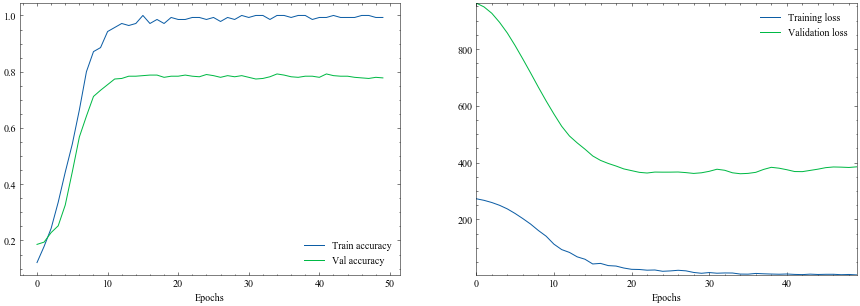

In [8]:
import matplotlib.pyplot as plt
with plt.style.context(['science', 'no-latex']):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].plot(his.history['acc'], label='Train accuracy')
    axes[0].plot(his.history['val_acc'], label='Val accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].legend()

    axes[1].plot(his.history['loss'], label='Training loss')
    axes[1].plot(his.history['val_loss'], label='Validation loss')
    axes[1].set_xlabel('Epochs')
    axes[1].legend()
    
    plt.autoscale(tight=True)
    plt.show()    